import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [27]:
path="E:/transData.csv"
df_trans=pd.read_csv(path)

In [24]:
path="E:/testSamples.csv"
df_test=pd.read_csv(path)

In [297]:
#understanding the data
df_trans.head(5)

,transaction_id,sample_id,transaction_type,transaction_amount
0,52346326,11,REBILL,24.95
1,52346327,11,REBILL,24.95
2,52346328,32,REBILL,29.95
3,52346329,32,REBILL,29.95
4,52346330,32,REBILL,29.95


In [25]:
df_test.head(5)

,sample_id,test_group
0,1,0
1,2,1
2,3,0
3,4,1
4,5,1


In [32]:
df_trans.describe(include="all")
#no outliers observed

,transaction_id,sample_id,transaction_type,transaction_amount
count,7.430000e+03,7430.000000,7430,7430.000000
unique,NaN,NaN,3,NaN
top,NaN,NaN,REBILL,NaN
freq,NaN,NaN,6961,NaN
mean,5.235004e+07,30245.874024,NaN,24.935720
std,2.145001e+03,17064.733330,NaN,15.050653
min,5.234633e+07,11.000000,NaN,-39.950000
25%,5.234818e+07,15866.250000,NaN,24.950000
50%,5.235004e+07,30557.000000,NaN,24.950000
75%,5.235190e+07,44945.000000,NaN,32.950000


In [33]:
df_test.describe(include="all")

,sample_id,test_group
count,59721.00000,59721.000000
mean,29861.00000,0.248405
std,17240.11205,0.432092
min,1.00000,0.000000
25%,14931.00000,0.000000
50%,29861.00000,0.000000
75%,44791.00000,0.000000
max,59721.00000,1.000000


In [43]:
#joining the data sets into one data frame
df = pd.merge(df_trans, df_test)

In [307]:
#checking for NUlL values if any
newdf.isnull()

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False
10,False,False,False,False,False
...,...,...,...,...,...
7417,False,False,False,False,False
7418,False,False,False,False,False
7419,False,False,False,False,False
7427,False,False,False,False,False


In [ ]:
df.head(5)

In [99]:
#filtering the data
newdf = df[(df.test_group == 0) & (df.transaction_type=='REBILL')]

In [305]:
newdf.head(5)

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
6,52346332,103,REBILL,19.95,0
7,52346333,103,REBILL,19.95,0
8,52346334,103,REBILL,19.95,0
9,52346335,103,REBILL,19.95,0
10,52346336,103,REBILL,19.95,0


In [101]:
print(newdf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 6 to 7428
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      3756 non-null   int64  
 1   sample_id           3756 non-null   int64  
 2   transaction_type    3756 non-null   object 
 3   transaction_amount  3756 non-null   float64
 4   test_group          3756 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 176.1+ KB
None


In [144]:
#Grouping the user id that have atleast 1 REBILL
df3=newdf.groupby(['sample_id'])['transaction_type'].count().pipe(lambda  transaction_type: transaction_type.loc[transaction_type>=1])

In [309]:
df3.head(5)

sample_id
103    11
109     1
127     2
135     3
364     2
Name: transaction_type, dtype: int64

In [325]:
control_group_Rebill= df3.count() 
control_group_Rebill

941

In [ ]:
#Total 941 test group users have REBIll atleast once.

In [326]:
total_control_group_samples = df4.count() 
total_control_group_samples

transaction_id        4050
sample_id             4050
transaction_type      4050
transaction_amount    4050
test_group            4050
dtype: int64

In [328]:
avg_control_group= control_group_Rebill/total_control_group_samples
avg_control_group

transaction_id        0.232346
sample_id             0.232346
transaction_type      0.232346
transaction_amount    0.232346
test_group            0.232346
dtype: float64

In [ ]:
#Total 0 control group samples=4050
#Number of 0 control group samples with atleast 1 REBILL = 941
#Avg. of 0 control group sample with atleast 1 REBILL = 941/4050= 0.23

In [148]:
df5 = df[(df.test_group == 1) & (df.transaction_type=='REBILL')]

In [320]:
df5.head(5)

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
0,52346326,11,REBILL,24.95,1
1,52346327,11,REBILL,24.95,1
2,52346328,32,REBILL,29.95,1
3,52346329,32,REBILL,29.95,1
4,52346330,32,REBILL,29.95,1


In [335]:
test_group_rebill= df5.count()
test_group_rebill

transaction_id        3205
sample_id             3205
transaction_type      3205
transaction_amount    3205
test_group            3205
dtype: int64

In [152]:
df6=df5.groupby(['sample_id'])['transaction_type'].count().pipe(lambda  transaction_type: transaction_type.loc[transaction_type>=1])

In [331]:
df6.head(5)

sample_id
11     2
32     4
137    2
138    1
249    1
Name: transaction_type, dtype: int64

In [336]:
test_group_sample=df6.count()
test_group_sample

1556

In [338]:
avg_test_group=test_group_sample/test_group_rebill
avg_test_group

transaction_id        0.485491
sample_id             0.485491
transaction_type      0.485491
transaction_amount    0.485491
test_group            0.485491
dtype: float64

In [ ]:
#Total 1 test group samples=3205
#Number of 1 test group samples with atleast 1 REBILL = 1556
#Avg. of 1 test group sample with atleast 1 REBILL = 1556/3205= 0.48

In [157]:
#Calculating the net revenue of control group(0)
df7 = df[(df.test_group == 0) & (df.transaction_type=='REBILL')]

In [159]:
df7.head(10)

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
6,52346332,103,REBILL,19.95,0
7,52346333,103,REBILL,19.95,0
8,52346334,103,REBILL,19.95,0
9,52346335,103,REBILL,19.95,0
10,52346336,103,REBILL,19.95,0
11,52346337,103,REBILL,19.95,0
12,52346338,103,REBILL,19.95,0
13,52346339,103,REBILL,19.95,0
14,52346340,103,REBILL,19.95,0
15,52346341,103,REBILL,19.95,0


In [178]:
df7.count()

transaction_id        3756
sample_id             3756
transaction_type      3756
transaction_amount    3756
test_group            3756
Sum                   3756
dtype: int64

In [176]:
revenue_control_group=df7.sum(axis = 0, skipna = True)
revenue_control_group

transaction_id                                             196626329591
sample_id                                                     110246451
transaction_type      REBILLREBILLREBILLREBILLREBILLREBILLREBILLREBI...
transaction_amount                                              97359.2
test_group                                                            0
Sum                                                             97359.2
dtype: object

In [172]:
Total = df7['transaction_amount'].sum()
print (Total)

97359.19999999997


In [174]:
average_revenue_per_user_of_control_group = Total/3756

In [175]:
print(average_revenue_per_user_of_control_group)

25.920979765708193


In [ ]:
#Following is the conclusion of above analysis.

#revenue_control_group = 97359.2
#average revenue  per user of control group = 97359/3756=25.9

In [181]:
#Calculating the net revenue of test group(1)
df8 = df[(df.test_group == 1) & (df.transaction_type=='REBILL')]
df8.count()

transaction_id        3205
sample_id             3205
transaction_type      3205
transaction_amount    3205
test_group            3205
dtype: int64

In [184]:
revenue_test_group=df8.sum(axis = 0, skipna = True)
Total_revenue_test_group = df8['transaction_amount'].sum()
print (Total_revenue_test_group)

100869.74999999997


In [186]:
average_revenue_per_user_of_control_group = Total_revenue_test_group/3205
average_revenue_per_user_of_control_group

31.472620904836184

In [ ]:
#Following is the conclusion of above analysis.

#revenue_test_group = 100869.7
#average revenue  per user of test group = 31.47

In [ ]:
#Is a user that must call-in more likely to produce a higher chargeback rate

In [234]:
#calculating charge back rate of calling  users/test users (1).
df10 = df[(df.test_group == 1) & (df.transaction_type=='REBILL')]
df10.head(5)

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
0,52346326,11,REBILL,24.95,1
1,52346327,11,REBILL,24.95,1
2,52346328,32,REBILL,29.95,1
3,52346329,32,REBILL,29.95,1
4,52346330,32,REBILL,29.95,1


In [244]:
df11 = df[(df.test_group == 1) & (df.transaction_type=='CHARGEBACK')]
df11.head(5)

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
32,52346358,296,CHARGEBACK,-29.95,1
137,52346463,1480,CHARGEBACK,-29.95,1
356,52346682,3542,CHARGEBACK,-39.95,1
357,52346683,3542,CHARGEBACK,-39.95,1
815,52347141,6731,CHARGEBACK,-39.95,1


In [245]:
total_rebill= df10.count()
total_rebill

transaction_id        3205
sample_id             3205
transaction_type      3205
transaction_amount    3205
test_group            3205
dtype: int64

In [246]:
total_chargeback= df11.count()
total_chargeback

transaction_id        57
sample_id             57
transaction_type      57
transaction_amount    57
test_group            57
dtype: int64

In [240]:
rate= total_chargeback/total_rebill
rate

transaction_id        0.017785
sample_id             0.017785
transaction_type      0.017785
transaction_amount    0.017785
test_group            0.017785
dtype: float64

In [ ]:
#charge back rate of calling cancellations is 0.0177

In [241]:
#calculating charge back rate of webform users/control users (0).

df12 = df[(df.test_group == 0) & (df.transaction_type=='REBILL')]
df12.head(5)

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
6,52346332,103,REBILL,19.95,0
7,52346333,103,REBILL,19.95,0
8,52346334,103,REBILL,19.95,0
9,52346335,103,REBILL,19.95,0
10,52346336,103,REBILL,19.95,0


In [248]:
total_rebill_0= df12.count()
total_rebill_0

transaction_id        3756
sample_id             3756
transaction_type      3756
transaction_amount    3756
test_group            3756
dtype: int64

In [247]:
df13 = df[(df.test_group == 0) & (df.transaction_type=='CHARGEBACK')]
df13.head(5)

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
170,52346496,2035,CHARGEBACK,-32.95,0
192,52346518,2192,CHARGEBACK,-19.95,0
249,52346575,2713,CHARGEBACK,-32.95,0
250,52346576,2713,CHARGEBACK,-32.95,0
344,52346670,3458,CHARGEBACK,-19.95,0


In [249]:
total_chargeback_0= df13.count()
total_chargeback_0

transaction_id        106
sample_id             106
transaction_type      106
transaction_amount    106
test_group            106
dtype: int64

In [250]:
rate_0= total_chargeback_0/total_rebill_0
rate_0

transaction_id        0.028222
sample_id             0.028222
transaction_type      0.028222
transaction_amount    0.028222
test_group            0.028222
dtype: float64

In [ ]:
#charge back rate of webform cancellation is 0.02

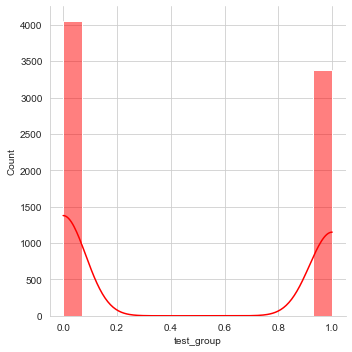

In [301]:
#probabilty distribution of test groups
x =df['test_group']
sns.displot(x, color="red",kde=True,);

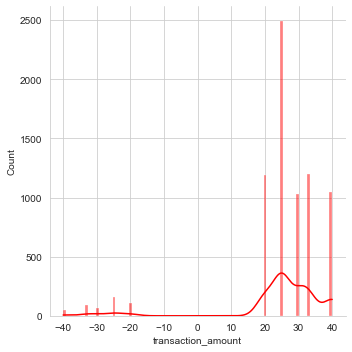

In [296]:
#probabilty distribution of transaction_amount
x =df['transaction_amount' ]
sns.displot(x, color="red",kde=True,);